In [ ]:
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

#Load the data
from google.colab import files # Use to load data on Google Colab
uploaded = files.upload() # Use to load data on Google Colab

#Store the data into the variable df
df = pd.read_csv('BTC-USD.csv')



Saving BTC-USD.csv to BTC-USD.csv


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


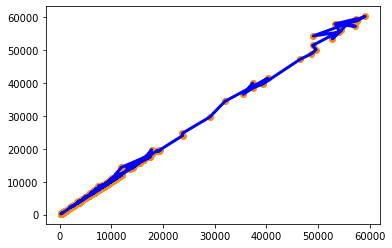

In [ ]:
#Feature scaling

msk = np.random.rand(len(df)) < 0.8

X = df["Open"]
Y = df["High"]
X_train = np.array(X[msk]).reshape(len(X[msk]),1)
X_test = np.array(X[~msk]).reshape(len(X[~msk]),1)
Y_train = np.array(Y[msk]).reshape(len(X[msk]),1)
Y_test = np.array(Y[~msk]).reshape(len(X[~msk]),1)


#Create SVR

#Choose a kernel
clf = svm.SVR(kernel='poly', C=1, degree=1)

X_train = X_train[~np.isnan(X_train)]
Y_train = Y_train[~np.isnan(Y_train)]
X_test = X_test[~np.isnan(X_test)]
Y_test = Y_test[~np.isnan(Y_test)]

X_train = X_train.reshape(-1, 1)
Y_train = Y_train.reshape(-1, 1)
Y_test = Y_test.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)
clf.fit(X_train,Y_train)

#Predict
predicted_vals = clf.predict(X_test)

plt.scatter(X_test, Y_test, color='darkorange', label='data')
plt.plot(X_test, Y_test, color='blue', linewidth=3)
plt.show()

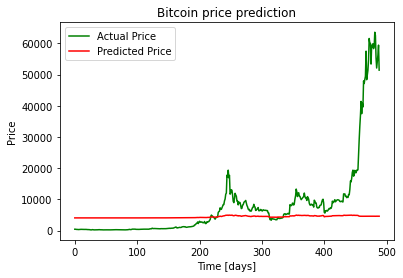

In [ ]:
plt.plot(abs(Y_test), label="Actual Price", color='green')
plt.plot(abs(predicted_vals), label="Predicted Price", color='red')


plt.title('Bitcoin price prediction')
plt.xlabel('Time [days]')
plt.ylabel('Price')
plt.legend(loc='best')
 
plt.show();

In [ ]:
from sklearn.metrics import mean_absolute_error

error1 = mean_absolute_error(X_test, predicted_vals)
print(error1)

6452.448885416869


In [ ]:
from sklearn.metrics import mean_squared_error
error = mean_squared_error(X_test, predicted_vals)
print(error)

161868976.6775059


In [ ]:
from sklearn.metrics import r2_score
r2_score(X_test, predicted_vals)

0.11375536775069983